In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
from utils.globals import RESULTS_DIR
from intervention_new import InterventionEvaluation
import pickle

In [2]:
file = "000111"
delta_probs = np.load(os.path.join(RESULTS_DIR, 'intervention_new', f'Meta-Llama-3.1-70B_delta_probs_{file}.npy'))
# [layer, completion, item, extraction_dataset, vector]

In [3]:
delta_probs.shape

(80, 2, 50, 4, 2)

In [4]:
delta_probs.mean(axis=2)[:,0,:,0].argmax(axis=0)

array([24, 18, 14, 79])

In [5]:
ylabel = r'$\Delta\ \text{P(Antonym)}$'
extract_datasets = ['+ Antonym English', '+ Antonym French', '+ Antonym Spanish', '+ Antonym Multiple Choice']

In [6]:
layer_evals = pickle.load(open(os.path.join(RESULTS_DIR, 'intervention_new', f'Meta-Llama-3.1-70B_layer_evals_{file}.pkl'), 'rb'))

In [7]:
layer_evals[0][0]

AttributeError: 'InterventionEvaluation' object has no attribute 'expected_completions'

In [9]:
layer_evals

In [8]:
layer = 0
item = 0
layer_evals[layer][item]

AttributeError: 'InterventionEvaluation' object has no attribute 'expected_completions'

# Zero-Shot

In [9]:
file = "zeroshot"
delta_probs_zeroshot = np.load(os.path.join(RESULTS_DIR, 'intervention_new', f'Meta-Llama-3.1-70B_delta_probs_{file}.npy'))
delta_probs_zeroshot = np.expand_dims(delta_probs_zeroshot, axis=1) 

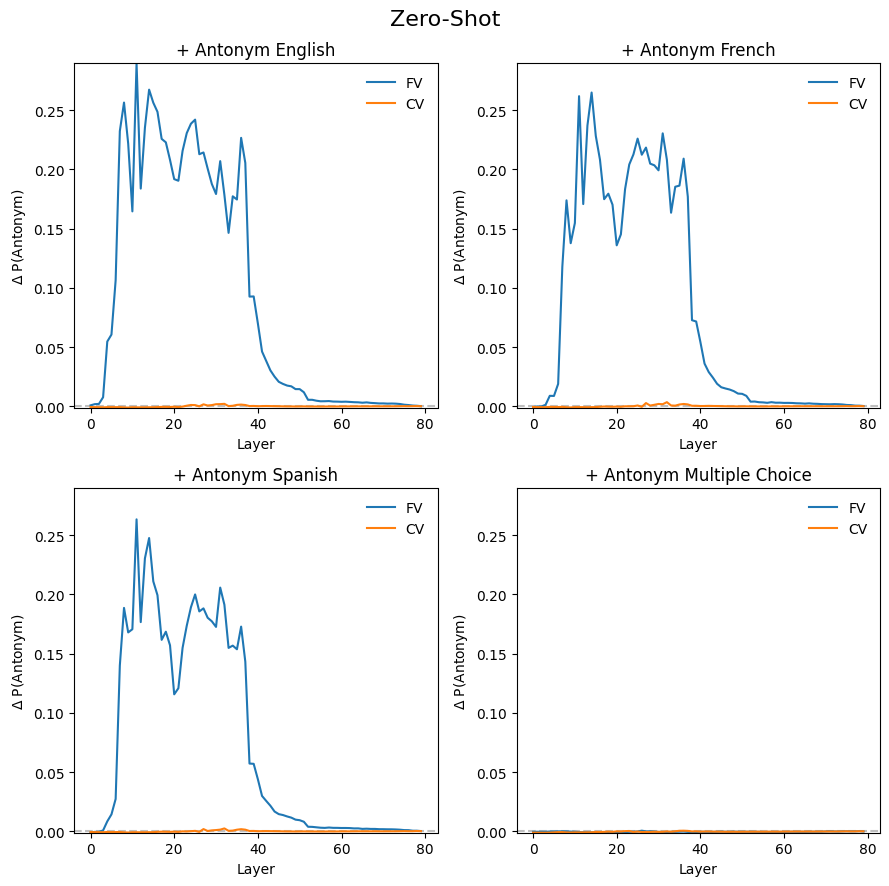

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax = ax.flatten()
for extract_idx, extract in enumerate(extract_datasets):
    ax[extract_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[extract_idx].plot(delta_probs_zeroshot.mean(axis=2)[:,0,extract_idx,0], label='FV')
    ax[extract_idx].plot(delta_probs_zeroshot.mean(axis=2)[:,0,extract_idx,1], label='CV')
    ax[extract_idx].legend(frameon=False)
    ax[extract_idx].set_title(extract)
    ax[extract_idx].set_xlabel('Layer')
    ax[extract_idx].set_ylabel(ylabel)
    ax[extract_idx].set_ylim(delta_probs_zeroshot.mean(axis=2).min(), delta_probs_zeroshot.mean(axis=2).max())

plt.suptitle('Zero-Shot', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/9l/dl632xqj3d57xyzhdlhfn4x80000gn/T/ipykernel_16410/839944288.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


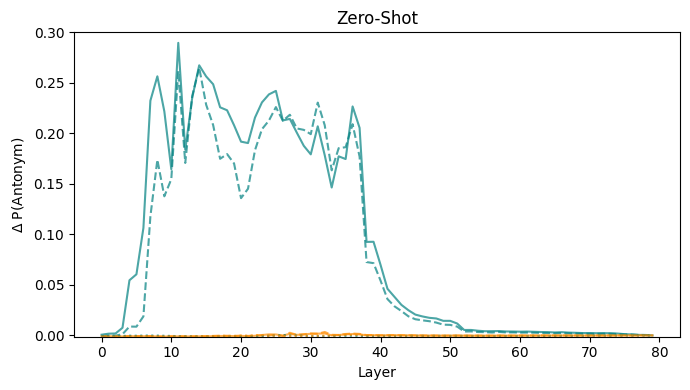

In [23]:
plt.figure(figsize=(7, 4))
linestyles = ['solid', 'dashed', '', 'dotted']
for extract_idx, extract in enumerate(['+ Antonym English', '+ Antonym French', '+ Antonym Spanish', '+ Antonym Multiple Choice']):
    if extract == '+ Antonym Spanish':
        continue
    plt.plot(delta_probs_zeroshot.mean(axis=2)[:,0,extract_idx,0], 
             linestyle=linestyles[extract_idx],
             color='teal', 
             alpha=0.7)
    plt.plot(delta_probs_zeroshot.mean(axis=2)[:,0,extract_idx,1], 
             linestyle=linestyles[extract_idx],
             color='darkorange',
             alpha=0.7)

plt.title('Zero-Shot')
plt.xlabel('Layer')
plt.ylabel(ylabel)
plt.ylim(delta_probs_zeroshot.mean(axis=2).min(), 0.3)

plt.legend(frameon=False)

plt.tight_layout()
plt.show()

In [42]:
delta_probs.mean(axis=2)[:,0,0,0].argmax()

24

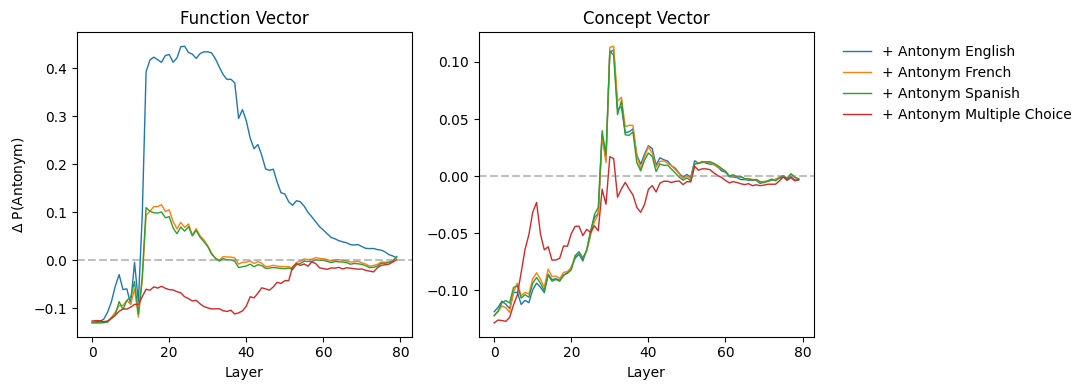

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
ax = ax.flatten()
for vector_idx in range(2):
    if vector_idx == 0: ax[vector_idx].set_ylabel(ylabel)
    for extract_idx, extract in enumerate(extract_datasets):
        ax[vector_idx].plot(delta_probs.mean(axis=2)[:,0,extract_idx,vector_idx], label=extract, linewidth=1)
        #ax[vector_idx].plot(delta_probs.mean(axis=1)[:,extract_idx,vector_idx], label=extract, linewidth=1)
    ax[vector_idx].set_xlabel('Layer')
    ax[vector_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
ax[0].set_title('Function Vector')
ax[1].set_title('Concept Vector')
ax[vector_idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

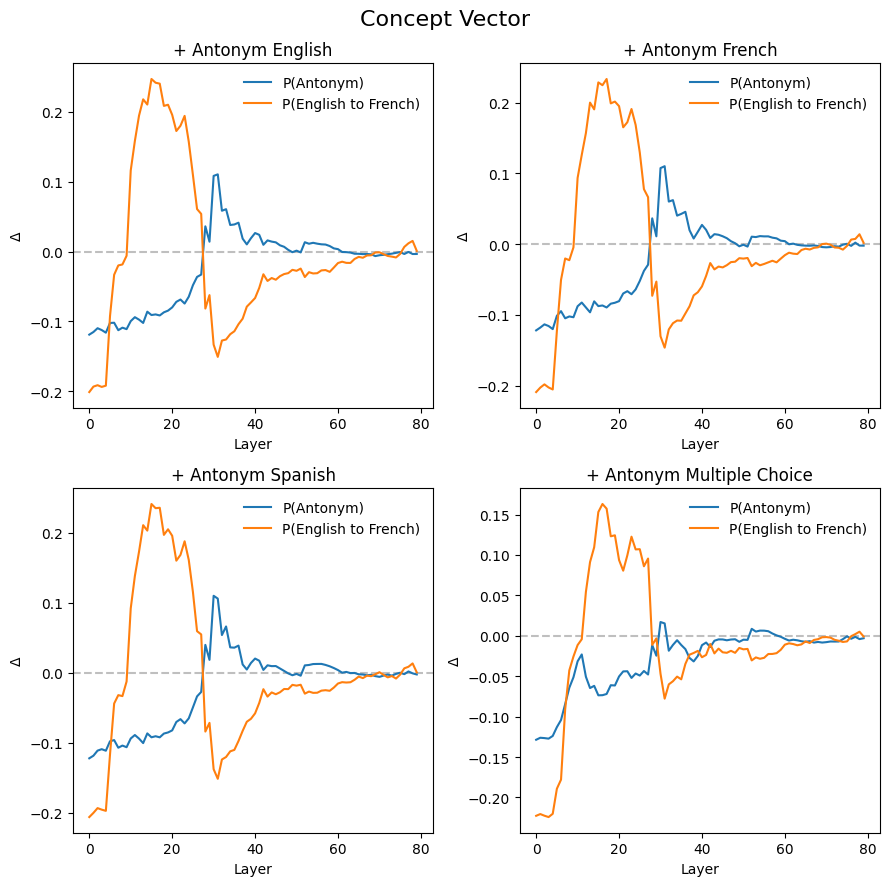

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax = ax.flatten()
for extract_idx, extract in enumerate(extract_datasets):
    ax[extract_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,0,extract_idx,1], label='P(Antonym)')
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,1,extract_idx,1], label='P(English to French)')
    ax[extract_idx].legend(frameon=False)
    ax[extract_idx].set_title(extract)
    ax[extract_idx].set_xlabel('Layer')
    ax[extract_idx].set_ylabel(r'$\Delta$')

plt.suptitle('Concept Vector', fontsize=16)
plt.tight_layout()
plt.show()

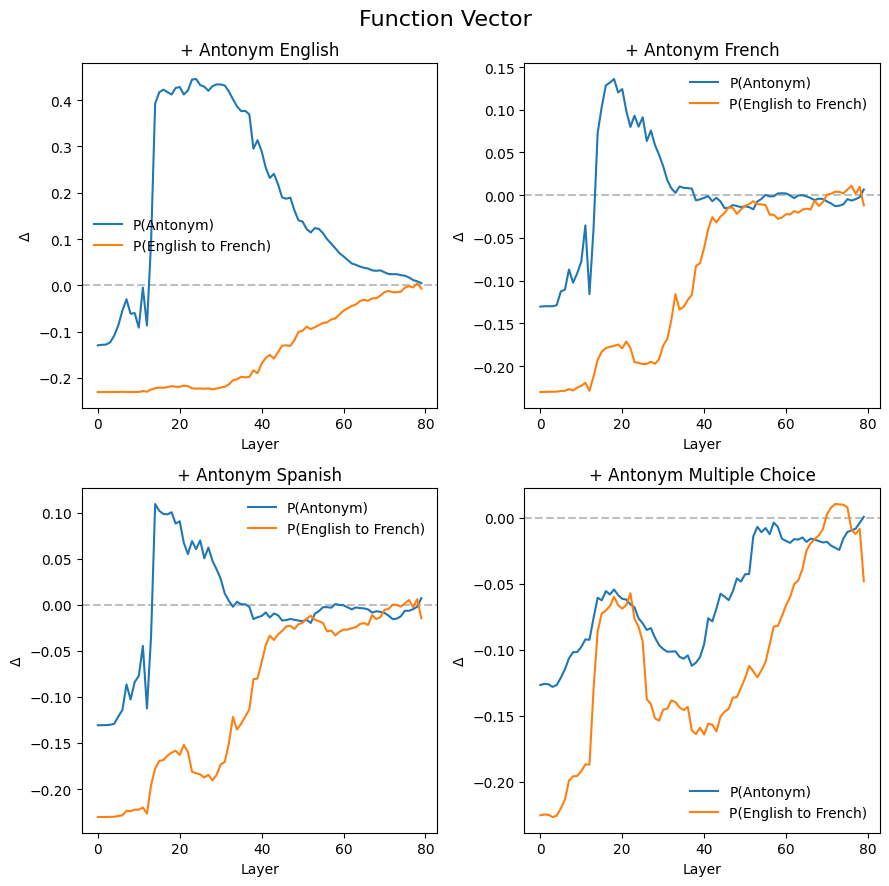

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax = ax.flatten()
for extract_idx, extract in enumerate(extract_datasets):
    ax[extract_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,0,extract_idx,0], label='P(Antonym)')
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,1,extract_idx,0], label='P(English to French)')
    ax[extract_idx].legend(frameon=False)
    ax[extract_idx].set_title(extract)
    ax[extract_idx].set_xlabel('Layer')
    ax[extract_idx].set_ylabel(r'$\Delta$')

plt.suptitle('Function Vector', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
delta_probs_lang = np.load(os.path.join(RESULTS_DIR, 'intervention_new', f'Meta-Llama-3.1-70B_delta_probs_{file}_lang.npy'))

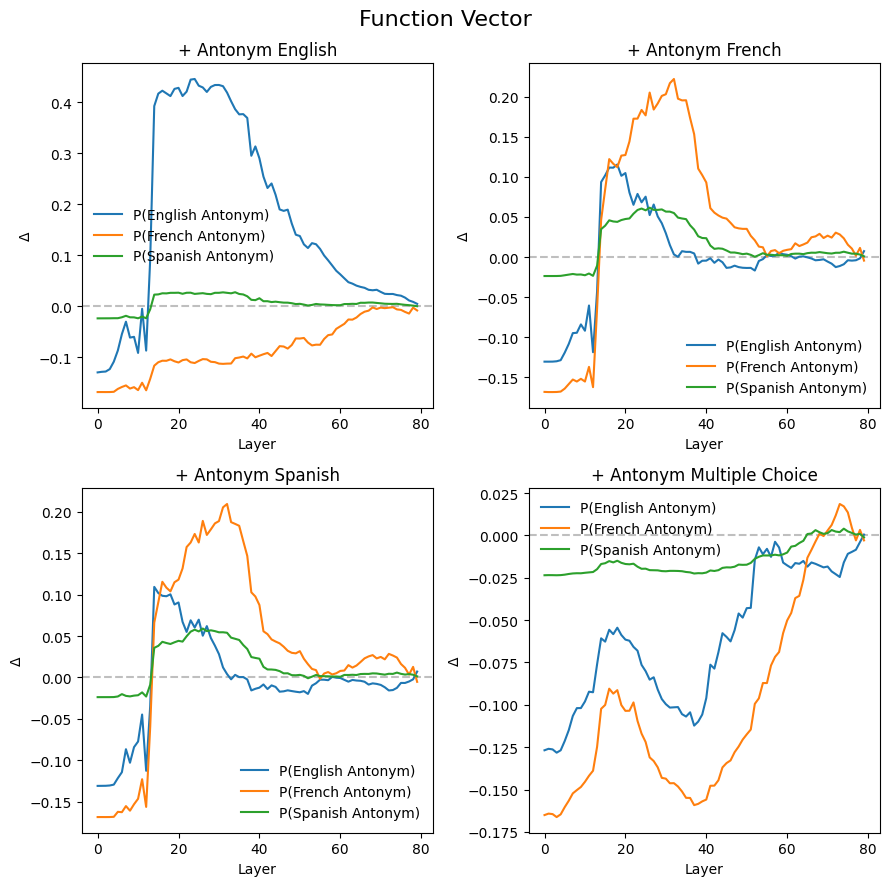

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax = ax.flatten()
for extract_idx, extract in enumerate(extract_datasets):
    ax[extract_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,0,extract_idx,0], label='P(English Antonym)')
    ax[extract_idx].plot(delta_probs_lang.mean(axis=2)[:,0,extract_idx,0], label='P(French Antonym)')
    ax[extract_idx].plot(delta_probs_lang.mean(axis=2)[:,1,extract_idx,0], label='P(Spanish Antonym)')
    ax[extract_idx].legend(frameon=False)
    ax[extract_idx].set_title(extract)
    ax[extract_idx].set_xlabel('Layer')
    ax[extract_idx].set_ylabel(r'$\Delta$')

plt.suptitle('Function Vector', fontsize=16)
plt.tight_layout()
plt.show()

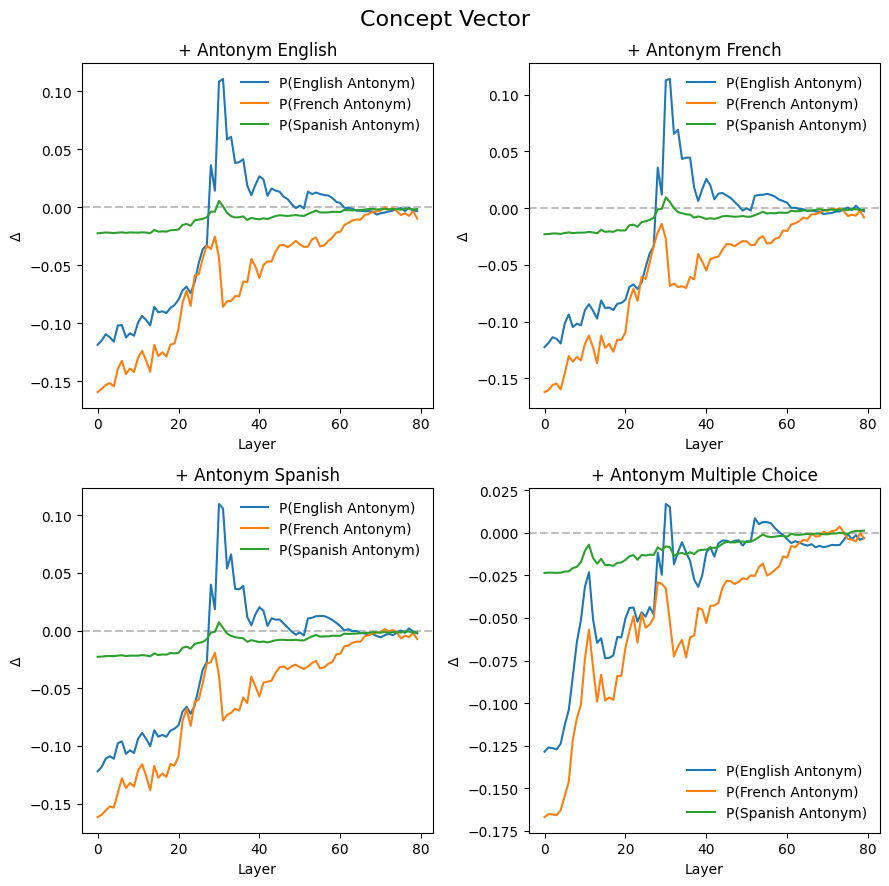

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
ax = ax.flatten()
for extract_idx, extract in enumerate(extract_datasets):
    ax[extract_idx].axhline(0, color='grey', linestyle='--', alpha=0.5)
    ax[extract_idx].plot(delta_probs.mean(axis=2)[:,0,extract_idx,1], label='P(English Antonym)')
    ax[extract_idx].plot(delta_probs_lang.mean(axis=2)[:,0,extract_idx,1], label='P(French Antonym)')
    ax[extract_idx].plot(delta_probs_lang.mean(axis=2)[:,1,extract_idx,1], label='P(Spanish Antonym)')
    ax[extract_idx].legend(frameon=False)
    ax[extract_idx].set_title(extract)
    ax[extract_idx].set_xlabel('Layer')
    ax[extract_idx].set_ylabel(r'$\Delta$')

plt.suptitle('Concept Vector', fontsize=16)
plt.tight_layout()
plt.show()